<a href="https://colab.research.google.com/github/Gyanprakash136/Machine-learning-mini-projects/blob/main/Medical_insurance_predictor_using_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
df = pd.read_csv(f'{path}/insurance.csv')

In [11]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


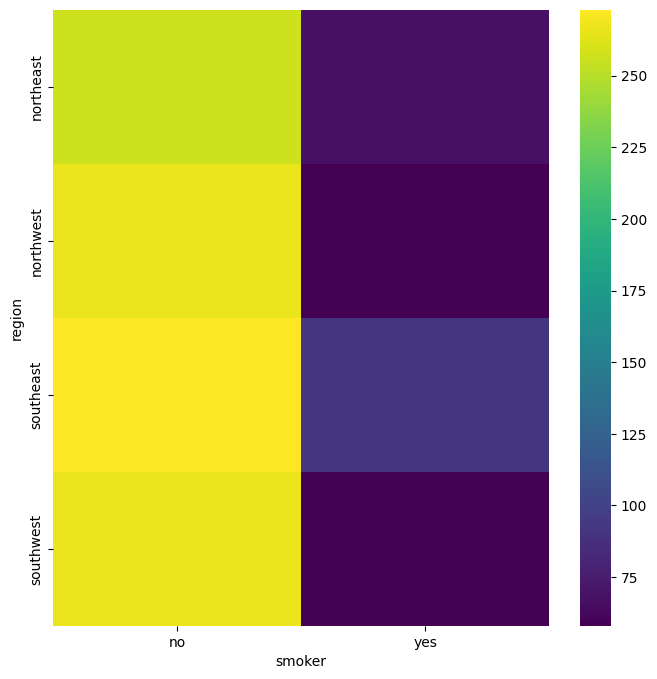

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in df.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

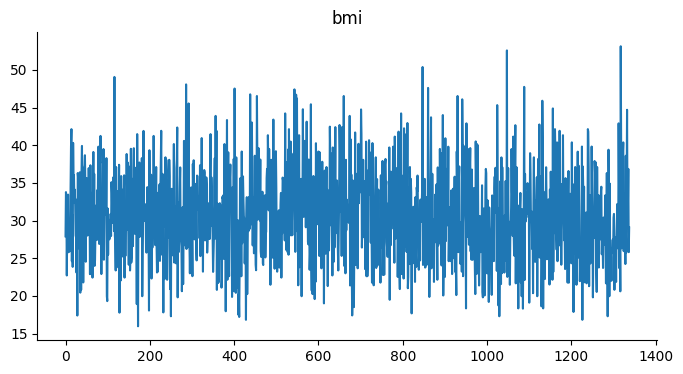

In [14]:
from matplotlib import pyplot as plt
df['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

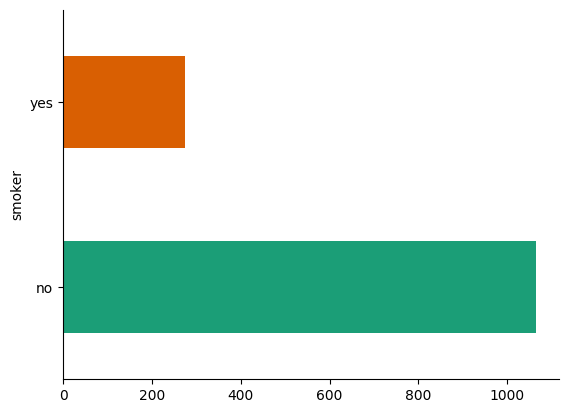

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

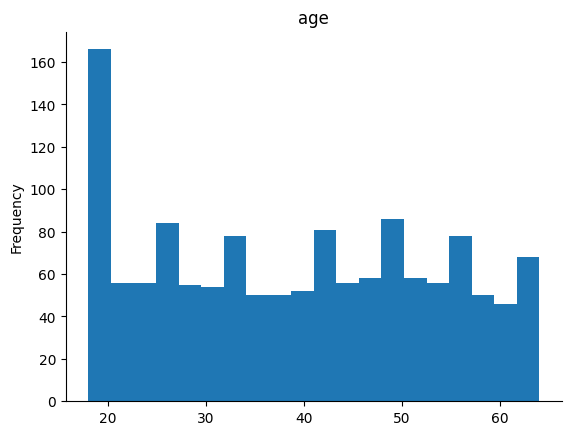

In [17]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [21]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [22]:
df["bmi"].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [23]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [24]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

->Gender need to be one hot encoded
->smoker need to be one hot encoded
->Region need to be one hot encoded


In [25]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
df = pd.concat([df, pd.get_dummies(df['sex'], dtype=int)], axis=1)
df = df.drop('sex', axis=1)

In [27]:
df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [28]:
df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [29]:


df = df.drop('male',axis=1)

In [30]:
df.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.900,0,yes,southwest,16884.92400,1
1,18,33.770,1,no,southeast,1725.55230,0
2,28,33.000,3,no,southeast,4449.46200,0
3,33,22.705,0,no,northwest,21984.47061,0
4,32,28.880,0,no,northwest,3866.85520,0


In [31]:
df.rename(columns={'female':'sex'},inplace=True)

for the user female = 1 and male = 0

In [32]:
df = pd.concat([df,pd.get_dummies(df['smoker'], dtype=int)],axis=1)

In [33]:
df = df.drop('no',axis=1)

In [34]:
df = df.drop('smoker',axis=1)

In [35]:
df.head()

,age,bmi,children,region,charges,sex,yes
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [36]:
df.rename(columns={'yes':'smoker'},inplace=True)

In [37]:
pd.get_dummies(df['region'],dtype=int)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [38]:
df = pd.concat([df,pd.get_dummies(df["region"],dtype=int)],axis=1)


In [39]:
df = df.drop('region',axis=1)

In [40]:
X = df.drop('charges',axis=1)
y = df['charges']

In [41]:
X.shape # 1338 data of each feature # 9 feature after one heat encoding  we are not feature scaling age , bmi and

(1338, 9)

In [42]:
def standard_scaler(X):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [43]:
df.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


Jumping to machine learning stuff ,  written codes are for the linear regression

In [45]:
X = df.drop('charges',axis=1)
y = df['charges']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [159]:
def compute_gradient(X,y,W,b,lambda_=1):
  m = X.shape[0]
  n = len(W)
  dj_dw = np.zeros((n,))
  dj_db = 0
  f_wb = np.dot(X,W)+b
  error = f_wb - y.values # Convert y (y_train) to a NumPy array
  for i in range(m):
    dj_dw += np.dot(error[i],X[i]) # Use NumPy indexing
  dj_db += np.sum(error) # Sum the errors for dj_db
  dj_dw = dj_dw/m
  dj_db = dj_db/m # Corrected dj_db calculation
  for j in range(n):
    dj_dw[j] += (lambda_/m)*W[j] # Apply regularization term
  return dj_dw,dj_db

In [160]:
def compute_gradient_descent(X,y ,w,b,alpha, num_iters,lambda_=1):
  W_in  = w.copy()
  b_in  = b
  for i in range(num_iters):
    dj_dw,dj_db = compute_gradient(X,y,W_in,b_in,lambda_)
    W_in -= alpha*dj_dw
    b_in -= alpha*dj_db
  return W_in , b_in



In [161]:
def predict(X,W,b):
  result = np.dot(X,W) + b
  return result


In [178]:
w_in = np.zeros(X_train.shape[1])
b_in = 0
y_train_updated = y_train
w_updated,b_updated  = compute_gradient_descent(X_train_scaled,y_train,w_in,b_in,0.1,5000,1)

In [179]:
b_updated

np.float64(13267.935817337979)

In [180]:
w_updated


array([3639.30554734, 2040.37790853,  513.48564272,  -23.31000955,
       9536.53404476,  216.3437472 ,   62.00613346, -122.37443668,
       -155.11884009])

In [181]:
y_predicted = predict(X_test_scaled ,w_updated,b_updated)

In [182]:
from sklearn.metrics import r2_score
r2_score(y_predicted,y_test)

0.6836308363635903